Output()

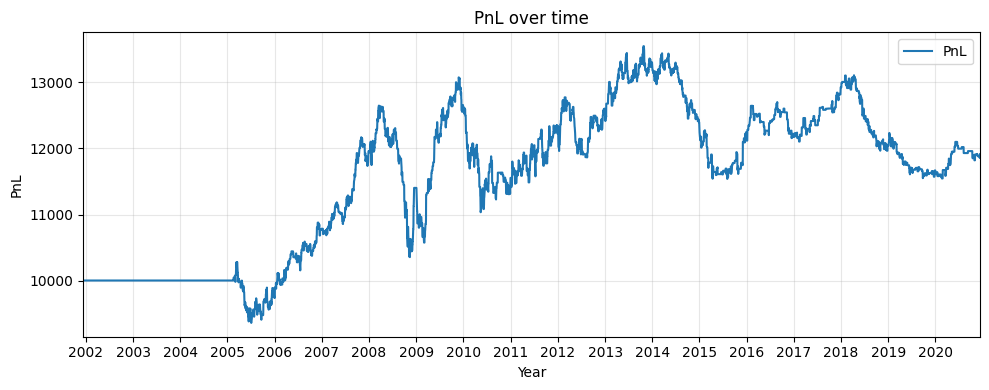

In [12]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys, pathlib
proj_root = pathlib.Path("..").resolve()
if str(proj_root) not in sys.path:
    sys.path.insert(0, str(proj_root))

from src.backtest import backtest_pnl



start = widgets.DatePicker(description="Beginning")
end = widgets.DatePicker(description="End")
run = widgets.Button(description="Launch", button_style="primary")
out = widgets.Output()

def _run(_):
    with out:
        out.clear_output()
        res = backtest_pnl(
            n_splits=5,
            threshold=0.5,
            position_mode="long_only", #long method only here so no short , or short long 
            position_size=1.0,
            fee_per_trade=0.0,
            start_date=str(start.value) if start.value else None,
            end_date=str(end.value) if end.value else None,
        )

        s = res["signals"]  # contient date + equity
        plt.figure(figsize=(10,4))
        plt.plot(s["date"], s["equity"], label="PnL")

        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.set_xlim(s["date"].min(), s["date"].max())

        plt.title("PnL over time")
        plt.xlabel("Year")
        plt.ylabel("PnL")
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        display(res["summary"])

run.on_click(_run)
display(widgets.HBox([start, end, run]), out)


Output()

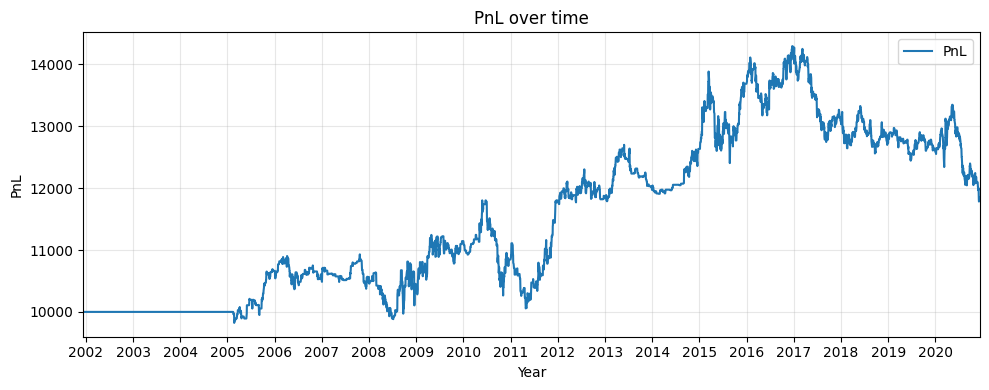

In [3]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

start = widgets.DatePicker(description="Beginning")
end = widgets.DatePicker(description="End")
run = widgets.Button(description="Launch", button_style="primary")
out = widgets.Output()

def _run(_):
    with out:
        out.clear_output()
        res = backtest_pnl(
            n_splits=5,
            threshold=0.5,
            position_mode="short_only", #short only here 
            position_size=1.0,
            fee_per_trade=0.0,
            start_date=str(start.value) if start.value else None,
            end_date=str(end.value) if end.value else None,
        )

        s = res["signals"]  # contient date + equity
        plt.figure(figsize=(10,4))
        plt.plot(s["date"], s["equity"], label="PnL")

        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.set_xlim(s["date"].min(), s["date"].max())

        plt.title("PnL over time")
        plt.xlabel("Year")
        plt.ylabel("PnL")
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        display(res["summary"])

run.on_click(_run)
display(widgets.HBox([start, end, run]), out)


Output()

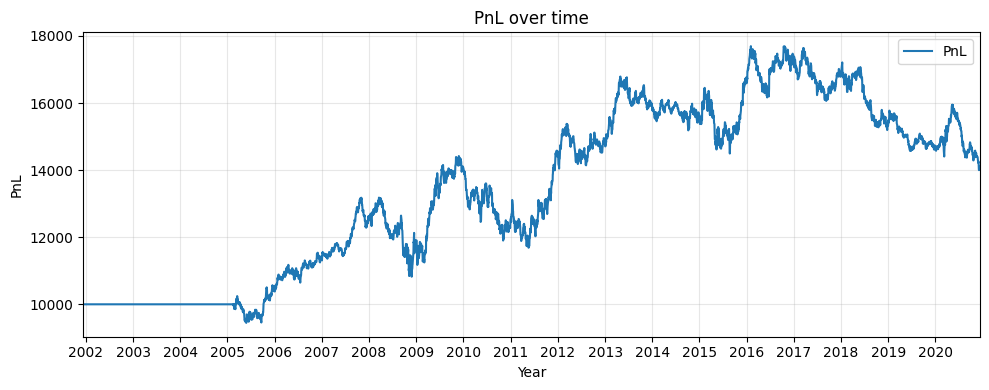

In [4]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

start = widgets.DatePicker(description="Beginning")
end = widgets.DatePicker(description="End")
run = widgets.Button(description="Launch", button_style="primary")
out = widgets.Output()

def _run(_):
    with out:
        out.clear_output()
        res = backtest_pnl(
            n_splits=5,
            threshold=0.5,
            position_mode="long_short", # 2 methods here 
            position_size=1.0,
            fee_per_trade=0.0,
            start_date=str(start.value) if start.value else None,
            end_date=str(end.value) if end.value else None,
        )

        s = res["signals"]  # contient date + equity
        plt.figure(figsize=(10,4))
        plt.plot(s["date"], s["equity"], label="PnL")

        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.set_xlim(s["date"].min(), s["date"].max())

        plt.title("PnL over time")
        plt.xlabel("Year")
        plt.ylabel("PnL")
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        display(res["summary"])

run.on_click(_run)
display(widgets.HBox([start, end, run]), out)


In [5]:
# si pas installé
# c:\Users\marti\projet-ml-\.venv\Scripts\python.exe -m pip install xgboost

from xgboost import XGBClassifier

def build_xgb():
    return XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=0,
        n_jobs=-1,
    )


In [6]:
res = backtest_pnl(
    n_splits=5,
    threshold=0.5,
    position_mode="long_only",
    position_size=1.0,
    fee_per_trade=0.0,
    start_date=str(start.value) if start.value else None,
    end_date=str(end.value) if end.value else None,
    model=build_xgb,   # <- ici
)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ipywidgets as widgets
from IPython.display import display
from xgboost import XGBClassifier

def build_xgb():
    return XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=0,
        n_jobs=-1,
    )

def run_backtest_and_plot(model_builder, start_date=None, end_date=None):
    res = backtest_pnl(
        n_splits=5,
        threshold=0.5,
        position_mode="short_only",
        position_size=1.0,
        fee_per_trade=0.0,
        start_date=start_date,
        end_date=end_date,
        model=model_builder,
    )

    s = res["signals"]
    plt.figure(figsize=(10, 4))
    plt.plot(s["date"], s["equity"], label="PnL")

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.set_xlim(s["date"].min(), s["date"].max())

    plt.title("PnL over time")
    plt.xlabel("Year")
    plt.ylabel("PnL")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    display(res["summary"])
    return res

# Widgets pour choisir les dates
start = widgets.DatePicker(description="Beginning")
end = widgets.DatePicker(description="End")
run = widgets.Button(description="Launch", button_style="primary")
out = widgets.Output()

def _run(_):
    with out:
        out.clear_output()
        run_backtest_and_plot(
            build_xgb,
            start_date=str(start.value) if start.value else None,
            end_date=str(end.value) if end.value else None,
        )

run.on_click(_run)
display(widgets.HBox([start, end, run]), out)


Output()